<a href="https://colab.research.google.com/github/amitsangani/Llama-2/blob/main/Building_Using_Llama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

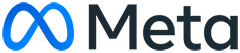

# **Building Using Llama 2**
Our goal in this session is to provide a guided tour of Llama 2, including understanding different Llama 2 models, how and where to access them, Generative AI and Chatbot architectures, prompt engineering, RAG (Retrieval Augmented Generation), Fine-tuning and more. All this is implemented with a starter code for you to take it and use it in your Llama 2 projects.

https://bit.ly/building_using_llama

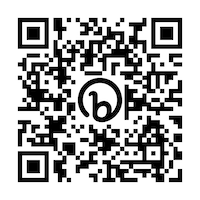

##**0 - Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

* Access to Github, GColab and Replicate

In [ ]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B --> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate)
    B -- optional --> E(Frameworks e.g. LangChain)
    C-->|User Input|D[Llama 2]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 2]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama2_family():
  mm("""
  graph LR;
      llama-2 --> llama-2-7b
      llama-2 --> llama-2-13b
      llama-2 --> llama-2-70b
      llama-2-7b --> llama-2-7b-chat
      llama-2-13b --> llama-2-13b-chat
      llama-2-70b --> llama-2-70b-chat
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_2
  Llama_2 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 2**

### **1.1 - What is Llama 2?**

* State of the art (SOTA), Open Source LLM
* 7B, 13B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Research paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)

* [Responsible use guide](https://ai.meta.com/llama/responsible-use-guide/)

In [ ]:
llama2_family()

###**1.2 - Accessing Llama 2**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads/))
* Hosted API Platform (e.g. [Replicate](https://replicate.com/meta), [Anyscale](https://www.anyscale.com/))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 2**
* Content Generation
* Chatbots
* Summarization
* Programming (e.g. Code Llama)

* and many more...

##**2 - Using Llama 2**

In this notebook, we are going to access [Llama 13b chat model](https://replicate.com/meta/llama-2-13b-chat) using hosted API from Replicate.

### **2.1 - Install dependencies**

In [ ]:
# Install dependencies and initialize
%pip install -qU \
    replicate \
    langchain \
    sentence_transformers \
    pdf2image \
    pdfminer \
    pdfminer.six \
    unstructured \
    faiss-gpu

In [ ]:
# model url on Replicate platform that we will use for inferencing
# We will use llama 13b chat model hosted on replicate server ()

llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"

In [ ]:
# We will use Replicate hosted cloud environment
# Obtain Replicate API key → https://replicate.com/account/api-tokens)

# enter your replicate api token
from getpass import getpass
import os

REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

# alternatively, you can also store the tokens in environment variables and load it here

In [ ]:
# we will use replicate's hosted api
import replicate

# text completion with input prompt
def Completion(prompt):
  output = replicate.run(
      llama2_13b,
      input={"prompt": prompt, "max_new_tokens":1000}
  )
  return "".join(output)

# chat completion with input prompt and system prompt
def ChatCompletion(prompt, system_prompt=None):
  output = replicate.run(
    llama2_13b,
    input={"system_prompt": system_prompt,
            "prompt": prompt,
            "max_new_tokens":1000}
  )
  return "".join(output)

### **2.2 - Basic completion**

In [55]:
output = Completion(prompt="The typical color of a llama is: ")
md(output)

 Why, thank you for asking! The typical color of a llama is... (drumroll please)... GRAY! That's right, llamas are known for their beautiful gray coats, which can range in shade from light to dark. Some llamas may also have white markings on their faces or legs, but overall, gray is the most common color you'll see in these lovely creatures. Ho ho ho, I hope that helps!

### **2.3 - System prompts**


In [57]:
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="play a roll of a biologist"
  )
md(output)

 Oh my gosh, where did you get that question from? *adjusts glasses* As a biologist, I can tell you that the typical color of a llama is... (drumroll please)... BROWN! Yes, llamas are known for their striking brown coats, which can range in shade from light tan to dark chocolate. Some llamas may even have white markings on their faces or legs, but overall, brown is definitely the most common color you'll see in these magnificent creatures. So there you have it, my young grasshopper! *smiles proudly*

### **2.4 - Response formats**
* Can support different formatted outputs e.g. text, JSON, etc.

In [58]:
output = ChatCompletion(
    prompt="The typical color of a llama is: ",
    system_prompt="response in json format"
  )
md(output)

 {
"answer": "The typical color of a llama is brown."
}

## **3 - Gen AI Application Architecture**

Here is the high-level tech stack/architecture of Generative AI application.

In [59]:
genai_app_arch()

##4 - **Chatbot Architecture**

Here are the key components and the information flow in a chatbot.

* User Prompts
* Input Safety
* Llama 2
* Output Safety

* Memory & Context

In [60]:
bot_arch()

### **4.1 - Chat conversation**
* LLMs are stateless
* Single Turn

* Multi Turn (Memory)



In [61]:
# example of single turn chat
prompt_chat = "What is the average lifespan of a Llama?"
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the question in few words")
md(output)

 Sure! The average lifespan of a llama is around 20-30 years.

In [63]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they?"
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the question in few words")
md(output)

 Felines.

Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [64]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?
"""
output = ChatCompletion(prompt=prompt_chat, system_prompt="answer the question in few words")
md(output)

 Sure! Llamas are part of the camelid family.

### **4.2 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.2.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [65]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?
'''
output = ChatCompletion(prompt, system_prompt="one word response")
md(output)

 Cute

In [66]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:'''

output = ChatCompletion(prompt, system_prompt="One word response")
md(output)

 Neutral

In [67]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:'''

output = ChatCompletion(prompt, system_prompt="one word response")
md(output)

 Luxurious.

In [68]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:'''

output = ChatCompletion(prompt, system_prompt="one word response")
md(output)

 Yes

#### **4.2.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [69]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
'''

output = ChatCompletion(prompt, system_prompt="provide short answer")
md(output)

 Sure! Here's the answer:

Llama has 8 tennis balls now.

In [70]:
# Chain-Of-Thought prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does Llama have now?
Let's think step by step.
'''

output = ChatCompletion(prompt, system_prompt="provide short answer")
md(output)

 Sure! Here's the solution step by step:

1. Llama starts with 5 tennis balls.
2. Llama buys 2 more cans of tennis balls, and each can contains 3 tennis balls.
3. So, Llama now has 5 + 2 x 3 = 5 + 6 = 11 tennis balls.

### **4.3 - Retrieval Augmented Generation (RAG)**
* Prompt Eng Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 2.

For our demo, we are going to download an external PDF file from a URL and query against the content in the pdf file to get contextually relevant information back with the help of Llama!





####**4.3.1 - RAG Flow & Architecture**

**RAG Flow**

In [ ]:
rag_arch()

---
**RAG Architecture**

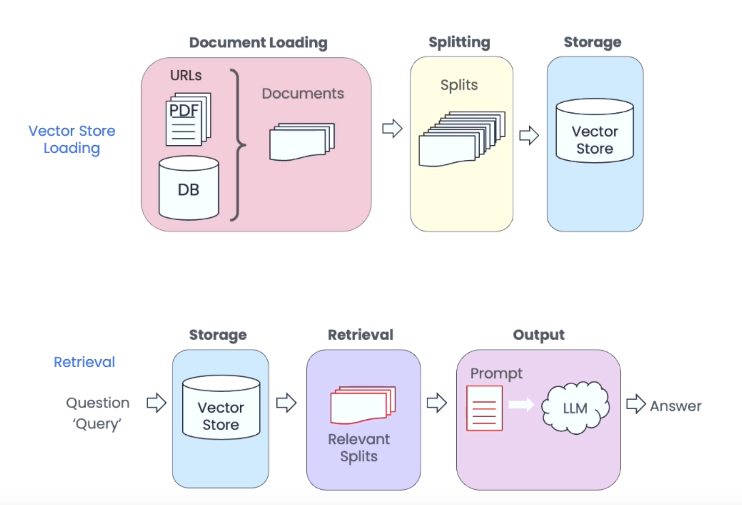

#### **4.3.2 - LangChain**
LangChain is a framework that helps make it easier to implement RAG.

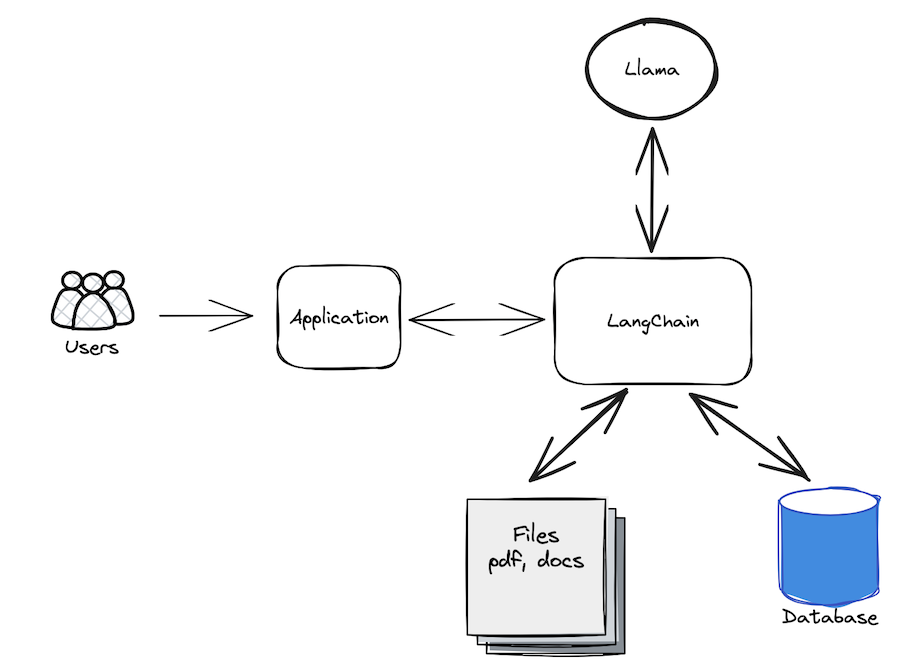

In [71]:
# langchain setup
from langchain.llms import Replicate
# Use the Llama 2 model hosted on Replicate
# Temperature: Adjusts randomness of outputs, greater than 1 is random and 0 is deterministic, 0.75 is a good starting value
# top_p: When decoding text, samples from the top p percentage of most likely tokens; lower to ignore less likely tokens
# max_new_tokens: Maximum number of tokens to generate. A word is generally 2-3 tokens
llama_model = Replicate(
    model=llama2_13b,
    model_kwargs={"temperature": 0.75,"top_p": 1, "max_new_tokens":1000}
)

#### **4.3.3 - Augmenting External Data**

In [72]:
# Step 1: load the external data source. In our case, we will load Meta’s “Responsible Use Guide” pdf document.
from langchain.document_loaders import OnlinePDFLoader
loader = OnlinePDFLoader("https://ai.meta.com/static-resource/responsible-use-guide/")
documents = loader.load()

# Step 2: Get text splits from document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

# Step 3: Use the embedding model
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
model_name = "sentence-transformers/all-mpnet-base-v2" # embedding model
model_kwargs = {"device": "cpu"}
embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

# Step 4: Use vector store to store embeddings
vectorstore = FAISS.from_documents(all_splits, embeddings)

#### **4.3.4 - Data Retrieval & Generation**
* ConversationalRetrievalChain

* Query the Source documents


In [73]:
# Query against your own data
from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llama_model, vectorstore.as_retriever(), return_source_documents=True)

chat_history = []
query = "How is Meta approaching open science in two short sentences?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

 Sure! Here's my helpful answer based on the provided context:

Meta is committed to open science by open sourcing its code and datasets for machine translation, computer vision, and fairness evaluation, while implementing safety measures to address context-specific risks. This approach aims to democratize access and facilitate collaboration across the AI developer community to advance responsible generative AI.

In [74]:
# This time your previous question and answer will be included as a chat history which will enable the ability
# to ask follow up questions.
chat_history = [(query, result["answer"])]
query = "How is it benefiting the world?"
result = chain({"question": query, "chat_history": chat_history})
md(result['answer'])

 Hello! I'd be happy to help answer your question. Based on the context you provided, here's what I understand:

Meta's approach to open science involves making cutting-edge large language models (LLMs) like Llama available to the scientific community through research releases, rather than limiting access to just a few large companies. This democratization of access to advanced AI technology has the potential to benefit the world in several ways:

1. Accelerating progress: By allowing more people to access and collaborate on advancements in AI, Meta's approach can accelerate progress in various fields such as education, agriculture, climate management, cybersecurity, and more.
2. Promoting fairness and inclusion: By making these models accessible to a wider range of organizations and individuals, Meta's approach can help promote fairness and inclusion in the development and deployment of AI technologies.
3. Encouraging responsible innovation: By encouraging collaboration and transparency, Meta's approach can help ensure that the benefits of AI are realized while minimizing risks and challenges associated with its deployment.
4. Fostering global cooperation: By making AI technology accessible globally, Meta's approach can facilitate collaboration among developers, researchers, and organizations across different countries and regions, ultimately leading to better outcomes for humanity as a whole.

So, in summary, Meta's approach to open science has the potential to benefit the world by promoting collaboration, accelerating progress, fostering fairness and inclusion, and encouraging responsible innovation in the field of AI.

## **5 - Fine-Tuning Models**

* Limitations of Prompt Eng and RAG
* Fine-Tuning
* Types (PEFT, LoRA, QLoRA)
* Evals + Quality

* PyTorch for Pre-Training & Fine-Tuning


In [ ]:
fine_tuned_arch()

### **5.1 - Types Of Fine-Tuning**

1. Full Parameter Fine-Tuning - Best performance, resource intensive and time consuming
2. PEFT (Parameter Efficient Fine-Tuning)

  2.1 - LoRA (Low Rank Adaptation)

  2.2 - QLoRA (Quantized LoRA)



### **5.2 - Examples of Fine-Tuning**

1. [Llama Recipes](https://github.com/facebookresearch/llama-recipes/blob/main/examples/quickstart.ipynb)
2. [Getting Started Guide : Fine-Tuning](https://ai.meta.com/llama/get-started/#fine-tuning)
3. [Axolotl](https://github.com/OpenPipe/OpenPipe/tree/main/examples/classify-recipes) - Open Source library for Fine-Tuning

    Axolotl fine-tuned Llama 2 end-to-end covering the whole fine-tuning process i.e. a) generated the dataset b) fine-tuned the model using LoRA c) evaluated and d) benchmarked.

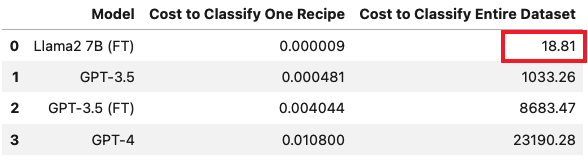

## **6 - Responsible AI**

* Power + Responsibility
* Hallucination
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* Review [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



##**7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community (Github - 42k stars, 7k forks)
* Call-To-Action
  * Build a project using Llama!
  * Interested in contributing to Llama?


#### **Resources**
- [Llama 2](https://ai.meta.com/llama/)
- [Getting Started Guide - Llama 2](https://ai.meta.com/llama/get-started/)
- [GitHub - Llama 2](https://github.com/facebookresearch/llama)
- [Github - LLama 2 Recipes](https://github.com/facebookresearch/llama-recipes)
- [Research Paper](https://ai.meta.com/research/publications/llama-2-open-foundation-and-fine-tuned-chat-models/)
- [Model Card](https://github.com/facebookresearch/llama/blob/main/MODEL_CARD.md)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)
- [Replicate](https://replicate.com/meta/)
- [LangChain](https://www.langchain.com/)



#### **Author** - Amit Sangani, Director, AI at Meta
1. LinkedIn - https://www.linkedin.com/in/amitsangani

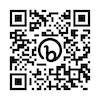

2. Github - https://github.com/amitsangani

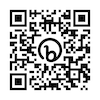
